In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('student-mat.csv')
pd.set_option('display.max_columns', 500)
dataset.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         6   5   6   6  
1     1       3         4   5   5   6  
2     3       3        10   7   8  10  
3     1       5         2  15  14  15  
4     2       5         4   6  10  10

# There are 395 attributes and 33 dimensions

In [3]:
# there are 395 attributes and 33 dimensions
dataset.shape


(395, 33)

In [4]:
dalc = dataset.iloc[:,26].values
walc = dataset.iloc[:,27].values
absense = dataset.iloc[:,29].values

# Average Dalc,Walc

In [5]:
float(str(round(dalc.mean(), 2)))

1.48

## Average Walc

In [6]:
float(str(round(walc.mean(), 2)))     

2.29

## Average Absense

In [7]:
float(str(round(absense.mean(), 2)))

5.71

## Minimum and Maximum of Absense

In [8]:
min(absense)

0

In [9]:
max(absense)

75

## Histogram

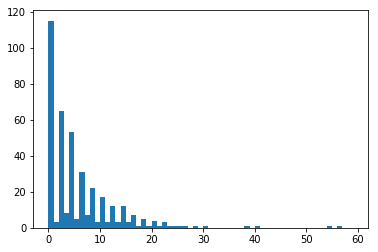

In [34]:
import matplotlib.pyplot as plt #Call function and load data
plt.hist([absense],bins=range(0,60)) #Show plot
plt.show() 

## Scatter Plot "Absense" and "Dalc"

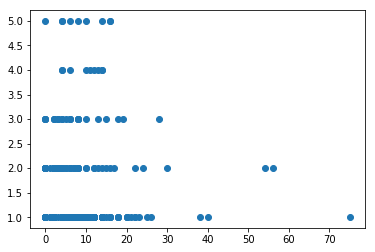

In [11]:
#Scatter plot
#Load X and Y data
x = absense
y = dalc #Call scatter function plot
plt.scatter(x,y) #Show plot
plt.show() 

## Find Correlatio between 'Absense' and 'Dalc'

In [26]:
np.corrcoef(absense,dalc)

#  There a correlation between 'Absense' and 'Dalc'

array([[1.        , 0.11190803],
       [0.11190803, 1.        ]])

## Findings

1) Range day of absenses is 75 days
2) Most day of absense is the first 20 days
3) There correlation between consumtion of alcohol on workday and absense and on first 10 days day of absense is one and alcohol comsuption is very high on that day.
4) No

# Classification Naive Bayes for : 'Age','Nursery','Dalc',Walc'

In [48]:
#Naive Bayes – play:
#Naive Bayes – Step 1:

#import libraries
import numpy as np
import pandas as pd
#import dataset
ds=pd.read_csv('student-mat.csv')
x=ds.iloc[:,np.r_[2,19,26,27]].values
y=ds.iloc[:,4].values

print(x)

[[18 'yes' 1 1]
 [17 'no' 1 1]
 [15 'yes' 2 3]
 ...
 [21 'no' 3 3]
 [18 'no' 3 4]
 [19 'yes' 3 3]]


In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
x[:, 0] = labelencoder_X.fit_transform(x[:, 0])
x[:, 1] = labelencoder_X.fit_transform(x[:, 1])
x[:, 2] = labelencoder_X.fit_transform(x[:, 2])
x[:, 3] = labelencoder_X.fit_transform(x[:, 3])

array([[3, 1, 0, 0],
       [2, 0, 0, 0],
       [0, 1, 1, 2],
       ...,
       [6, 0, 2, 2],
       [3, 0, 2, 3],
       [4, 1, 2, 2]], dtype=object)

In [50]:
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier=classifier.fit(x,y)

In [53]:
prediction=classifier.predict([[3., 1., 0., 0.]])#sunny day,cool temperature, humidity high, windy false 
print(prediction)

['GT3']
